<a href="https://colab.research.google.com/github/HMendesDev/Data-Science/blob/main/DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [1]:
import numpy as np
import itertools
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import pydotplus
from IPython.display import Image

# Conhecendo e carregando os dados

In [2]:
# Caminho do dataset
arq = "/content/drive/MyDrive/Data Science/Classificação/dataset_einstein.csv"

In [3]:
# Carregando o dataset
df = pd.read_csv(arq, sep = ";")

In [4]:
# Exibindo as 10 primeiras linhas
df.head(10)

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,Patient addmited to regular ward (1=yes. 0=no),Patient addmited to semi-intensive unit (1=yes. 0=no),Patient addmited to intensive care unit (1=yes. 0=no),Hemoglobin,Leukocytes,Basophils,Proteina C reativa mg/dL,Creatinine
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,-0.022340,-0.09461,-0.223767,-0.147895,2.089928
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,NaN
5,75f16746216c4d1,9,negative,0,0,0,NaN,NaN,NaN,NaN,NaN
6,2a2245e360808d7,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN
7,509197ec73f1400,16,negative,0,0,0,NaN,NaN,NaN,NaN,NaN
8,8bb9d64f0215244,1,negative,0,1,0,-0.774212,0.36455,-0.223767,-0.286986,-1.838623
9,5f1ed301375586c,17,negative,0,0,0,NaN,NaN,NaN,NaN,NaN


In [5]:
# Exibindo as 10 ultimas linhas
df.tail(10)

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,Patient addmited to regular ward (1=yes. 0=no),Patient addmited to semi-intensive unit (1=yes. 0=no),Patient addmited to intensive care unit (1=yes. 0=no),Hemoglobin,Leukocytes,Basophils,Proteina C reativa mg/dL,Creatinine
5634,db77903261ab6d0,15,positive,0,0,0,NaN,NaN,NaN,NaN,NaN
5635,45cdf2d498459f2,12,negative,0,0,0,NaN,NaN,NaN,NaN,NaN
5636,b6b965ae01dca11,6,negative,0,0,0,NaN,NaN,NaN,NaN,NaN
5637,2ea15fb0c220027,12,negative,0,0,0,NaN,NaN,NaN,NaN,NaN
5638,21af7c93c7fc540,14,negative,0,0,0,NaN,NaN,NaN,NaN,NaN
5639,ae66feb9e4dc3a0,3,positive,0,0,0,NaN,NaN,NaN,NaN,NaN
5640,517c2834024f3ea,17,negative,0,0,0,NaN,NaN,NaN,NaN,NaN
5641,5c57d6037fe266d,4,negative,0,0,0,NaN,NaN,NaN,NaN,NaN
5642,c20c44766f28291,10,negative,0,0,0,NaN,NaN,NaN,NaN,NaN
5643,2697fdccbfeb7f7,19,positive,0,0,0,0.541564,-1.288428,-1.140144,-0.50357,-0.735872


In [6]:
# Quantidade de colunas (campos)
df.shape[1]

11

In [7]:
# Quantidade de linhas (registro)
df.shape[0]

5644

In [8]:
# Colunas do nosso dataset
df.columns

Index(['Patient ID', 'Patient age quantile', 'SARS-Cov-2 exam result',
       'Patient addmited to regular ward (1=yes. 0=no)',
       'Patient addmited to semi-intensive unit (1=yes. 0=no)',
       'Patient addmited to intensive care unit (1=yes. 0=no)', 'Hemoglobin',
       'Leukocytes', 'Basophils', 'Proteina C reativa mg/dL', 'Creatinine'],
      dtype='object')

In [9]:
# Informações da base de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5644 entries, 0 to 5643
Data columns (total 11 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Patient ID                                             5644 non-null   object 
 1   Patient age quantile                                   5644 non-null   int64  
 2   SARS-Cov-2 exam result                                 5644 non-null   object 
 3   Patient addmited to regular ward (1=yes. 0=no)         5644 non-null   int64  
 4   Patient addmited to semi-intensive unit (1=yes. 0=no)  5644 non-null   int64  
 5   Patient addmited to intensive care unit (1=yes. 0=no)  5644 non-null   int64  
 6   Hemoglobin                                             603 non-null    float64
 7   Leukocytes                                             602 non-null    float64
 8   Basophils                                       

# Limpeza e Transformação

In [10]:
# Verificando registros nulos em cada coluna
df.isnull().sum()

,0
Patient ID,0
Patient age quantile,0
SARS-Cov-2 exam result,0
Patient addmited to regular ward (1=yes. 0=no),0
Patient addmited to semi-intensive unit (1=yes. 0=no),0
Patient addmited to intensive care unit (1=yes. 0=no),0
Hemoglobin,5041
Leukocytes,5042
Basophils,5042
Proteina C reativa mg/dL,5138


In [11]:
# Registros nulos total
df.isnull().sum().sum()

np.int64(25483)

In [12]:
# Linhas com registros nulos
df.loc[df.isnull().any(axis=1)]

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,Patient addmited to regular ward (1=yes. 0=no),Patient addmited to semi-intensive unit (1=yes. 0=no),Patient addmited to intensive care unit (1=yes. 0=no),Hemoglobin,Leukocytes,Basophils,Proteina C reativa mg/dL,Creatinine
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,NaN
5,75f16746216c4d1,9,negative,0,0,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
5638,21af7c93c7fc540,14,negative,0,0,0,NaN,NaN,NaN,NaN,NaN
5639,ae66feb9e4dc3a0,3,positive,0,0,0,NaN,NaN,NaN,NaN,NaN
5640,517c2834024f3ea,17,negative,0,0,0,NaN,NaN,NaN,NaN,NaN
5641,5c57d6037fe266d,4,negative,0,0,0,NaN,NaN,NaN,NaN,NaN


In [13]:
# Limpando registros nulos
df.dropna(inplace=True)

In [14]:
# Verificando após a remoção
df.isnull().sum()

,0
Patient ID,0
Patient age quantile,0
SARS-Cov-2 exam result,0
Patient addmited to regular ward (1=yes. 0=no),0
Patient addmited to semi-intensive unit (1=yes. 0=no),0
Patient addmited to intensive care unit (1=yes. 0=no),0
Hemoglobin,0
Leukocytes,0
Basophils,0
Proteina C reativa mg/dL,0


In [15]:
# Verificando linhas duplicadas
df[df.duplicated()]

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,Patient addmited to regular ward (1=yes. 0=no),Patient addmited to semi-intensive unit (1=yes. 0=no),Patient addmited to intensive care unit (1=yes. 0=no),Hemoglobin,Leukocytes,Basophils,Proteina C reativa mg/dL,Creatinine


# EDA e Modelo

In [16]:
# Medidas descritivas
df.describe()

,Patient age quantile,Patient addmited to regular ward (1=yes. 0=no),Patient addmited to semi-intensive unit (1=yes. 0=no),Patient addmited to intensive care unit (1=yes. 0=no),Hemoglobin,Leukocytes,Basophils,Proteina C reativa mg/dL,Creatinine
count,357.000000,357.000000,357.00000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000
mean,11.929972,0.140056,0.10084,0.056022,-0.050246,0.029812,-0.088577,0.083339,0.042541
std,5.570601,0.347532,0.30154,0.230288,1.073598,1.062005,1.027233,1.082540,1.027541
min,0.000000,0.000000,0.00000,0.000000,-4.345603,-2.020303,-1.140144,-0.535362,-2.389999
25%,8.000000,0.000000,0.00000,0.000000,-0.648900,-0.653951,-0.834685,-0.499596,-0.632489
50%,13.000000,0.000000,0.00000,0.000000,0.040316,-0.192008,-0.223767,-0.362492,-0.012191
75%,17.000000,0.000000,0.00000,0.000000,0.729532,0.531518,0.387152,0.183936,0.573645
max,19.000000,1.000000,1.00000,1.000000,2.671868,4.455255,11.078219,8.026671,5.053572


In [17]:
# Balançamento da variável target (Y)
balan = df["SARS-Cov-2 exam result"].value_counts().reset_index()
balan["Per"] = round((balan["count"] * 100) / balan["count"].sum())
balan

,SARS-Cov-2 exam result,count,Per
0,negative,302,85.0
1,positive,55,15.0


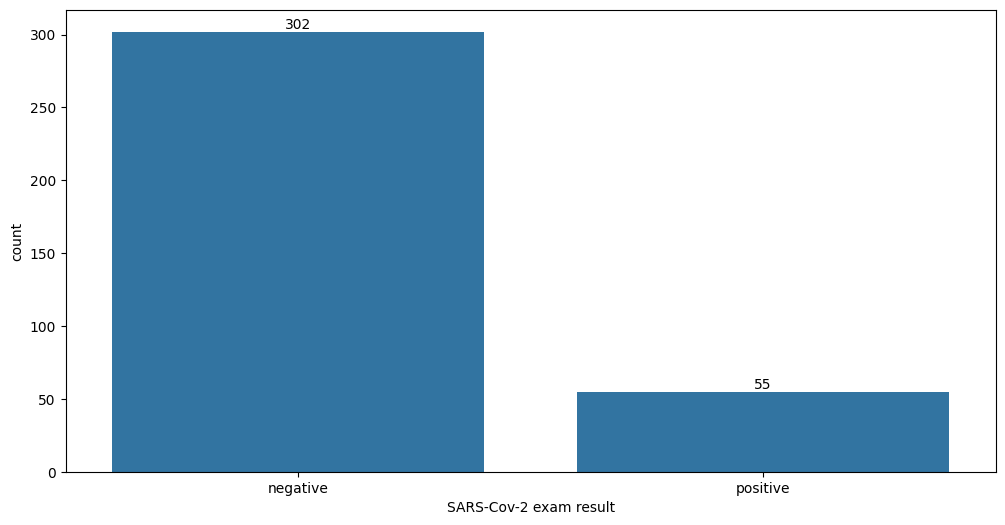

In [18]:
plt.figure(figsize=(12,6))
ax = sns.countplot(x = "SARS-Cov-2 exam result", data = df)
ax.bar_label(ax.containers[0])
plt.show()

In [19]:
# Separando variáveis dependentes e independentes
X = df.drop(columns = ["SARS-Cov-2 exam result","Patient ID"])
y = df["SARS-Cov-2 exam result"]

In [20]:
# Conjunto de teste e treino
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [21]:
# Algoritmo de classificação
model = DecisionTreeClassifier(max_depth=5, criterion="entropy")

In [22]:
# Gerando o modelo
model = model.fit(X_train, y_train)

In [35]:
# Classes que o modelo aprendeu
for i, classe in enumerate(model.classes_):
  print({i: classe})

{0: 'negative'}
{1: 'positive'}


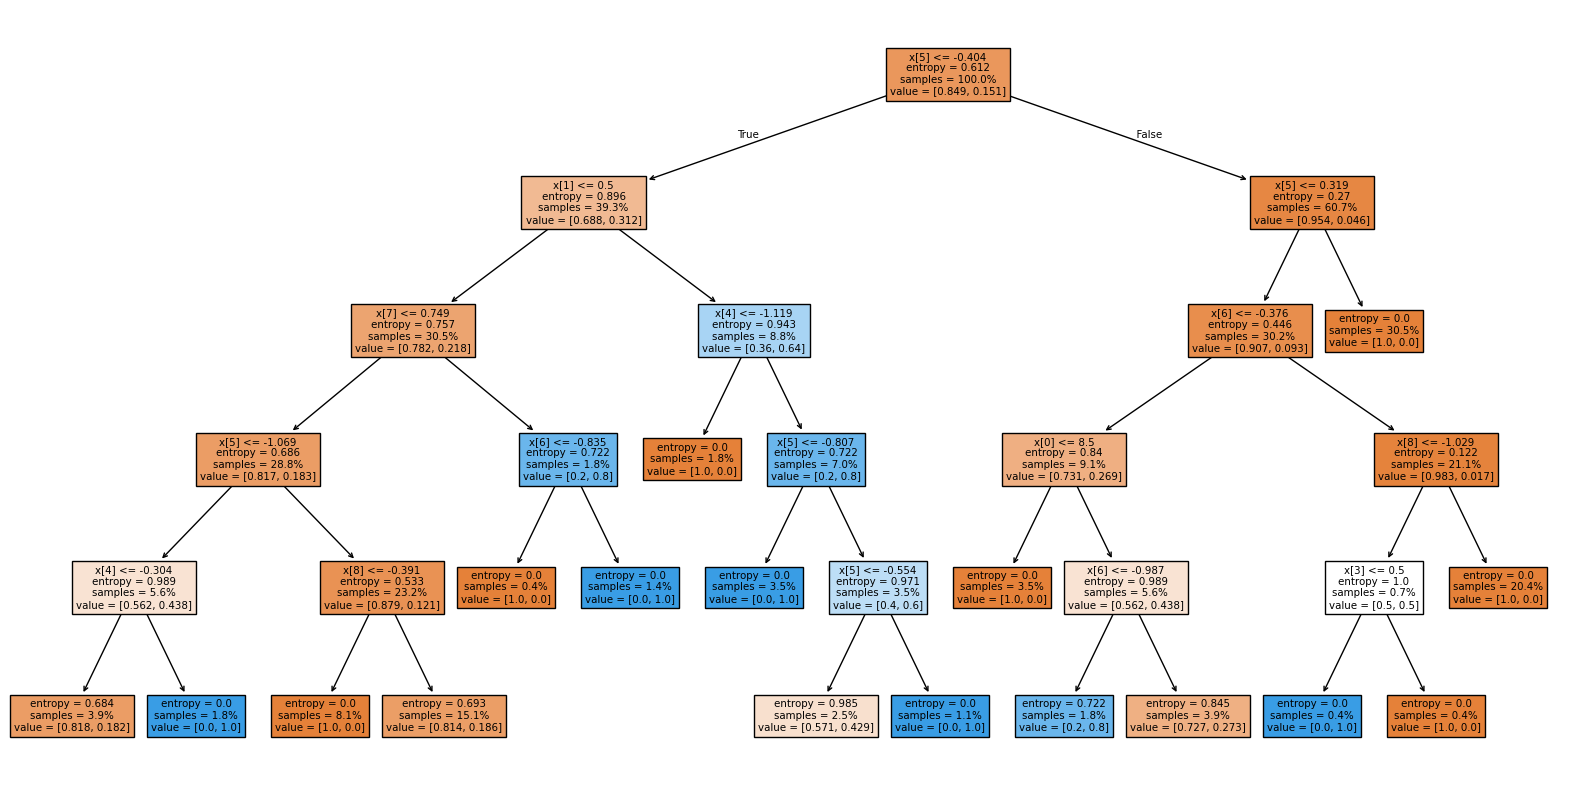

In [23]:
# Exibindo a arvore
plt.figure(figsize=(20,10))
tree.plot_tree(model, filled=True,proportion=True)
plt.show()

In [24]:
X.columns

Index(['Patient age quantile',
       'Patient addmited to regular ward (1=yes. 0=no)',
       'Patient addmited to semi-intensive unit (1=yes. 0=no)',
       'Patient addmited to intensive care unit (1=yes. 0=no)', 'Hemoglobin',
       'Leukocytes', 'Basophils', 'Proteina C reativa mg/dL', 'Creatinine'],
      dtype='object')

In [25]:
# Previsões do modelo
y_pred = model.predict(X_test)

In [26]:
# Acuracia do modelo
accuracy_score(y_test, y_pred)

0.875

Não podemos comemorar muito com a acuracia pois nosso dataset está desbalanceado
negative 85.0% vs positive 15.0%

In [27]:
# Classificação do modelo
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.93      0.92      0.92        60
    positive       0.62      0.67      0.64        12

    accuracy                           0.88        72
   macro avg       0.77      0.79      0.78        72
weighted avg       0.88      0.88      0.88        72



PRECISÃO: DAS CLASSIFICAÇÕES QUE O MODELO FEZ PARA UMA DETERMINADA CLASSE, QUANTAS EFETIVAMENTE ERAM CORRETAS?
RECALL: DE TODOS DADOS PERTECENTES A UMA DETERMINADA CLASSE, QUANTOS O MODELO CONSEGIU CLASSIFICAR CORRETAMENTE?

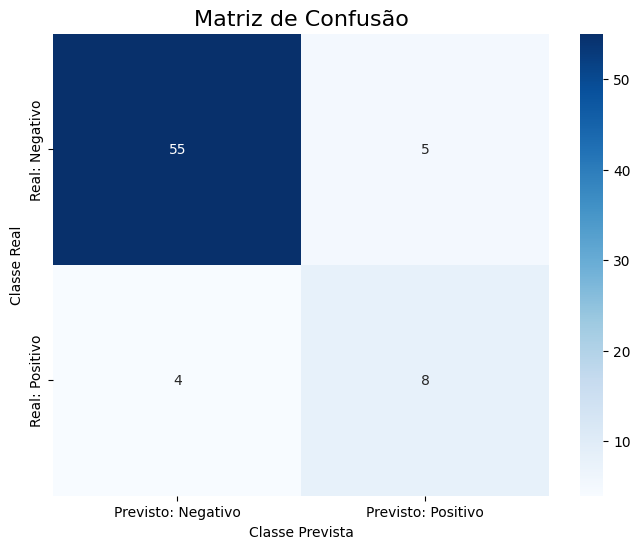

In [30]:
# Matriz de confusão
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Previsto: Negativo', 'Previsto: Positivo'],
            yticklabels=['Real: Negativo', 'Real: Positivo'])
plt.title('Matriz de Confusão', fontsize=16)
plt.ylabel('Classe Real')
plt.xlabel('Classe Prevista')
plt.show()

VP = Verdadeiro positivo (o modelo preve verdadeiro e realmente é verdadeiro)

FP = Falso positivo (o modelo preve verdadeiro quando na verdade é falso)

FN = Falso negativo (o modelo preve falso quando na verdade é verdadeiro)

VN = Verdadeiro negativo (o modelo preve falso e realmente é falso)